In [3]:
import sys
from pathlib import Path
from copy import deepcopy
import torch
import matplotlib.pyplot as plt
import numpy as np

try:
    if not(changed):
        raise Exception()
except:
    sys.path.append(str(Path(".").absolute().parent))
    changed = True

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
from notebooks.notebooks_utils import get_activation, load_checkpoint

job_id = "4344494" # faenet

trainer = load_checkpoint(job_id)
train_loader = trainer.get_dataloader(trainer.datasets["train"], trainer.samplers["train"])

🅾️  Removing orion config from continue config. Set to None: {}
✅ Loading config from /network/scratch/a/ali.ramlaoui/ocp/runs/4344494/checkpoints/checkpoint-0021588.pt (and loading latest checkpoint)
🏭 Overriding num_workers from 4 to 1 to match the machine's CPUs. Use --no_cpus_to_workers=true to disable this behavior.
{'frame_averaging': '2D', 'fa_method': 'random', 'model': {'name': 'faenet', 'act': 'swish', 'hidden_channels': 384, 'num_filters': 480, 'num_interactions': 5, 'num_gaussians': 104, 'dropout_lin': 0.0, 'dropout_edge': 0.0, 'dropout_lowest_layer': 'output', 'first_trainable_layer': '', 'cutoff': 6.0, 'use_pbc': True, 'regress_forces': '', 'tag_hidden_channels': 64, 'pg_hidden_channels': 64, 'phys_embeds': True, 'phys_hidden_channels': 0, 'energy_head': 'weighted-av-final-embeds', 'skip_co': 'concat', 'second_layer_MLP': False, 'complex_mp': True, 'mp_type': 'base', 'graph_norm': True, 'force_decoder_type': 'mlp', 'force_decoder_model_config': {'simple': {'hidden_channel

In [6]:
from notebooks.notebooks_utils import oc20_to_graph, plot_element_3d, process_datapoint

Graph with 25 nodes and 261 edges
{0: [0.0, 4.013790607452393, 22.82491683959961], 1: [3.596992254257202, 4.013790607452393, 22.82491683959961], 2: [7.193984508514404, 4.013790607452393, 22.82491683959961], 3: [0.0, 1.4703328609466553, 22.82491683959961], 4: [0.0, 6.557248115539551, 22.82491683959961], 5: [1.798496127128601, 0.19860410690307617, 21.55318832397461], 6: [1.798496127128601, 2.7420616149902344, 21.55318832397461], 7: [1.798496127128601, 5.285519123077393, 24.09664535522461], 8: [3.596992254257202, 1.4703328609466553, 22.82491683959961], 9: [3.596992254257202, 6.557248115539551, 22.82491683959961], 10: [5.395488262176514, 0.19860410690307617, 21.55318832397461], 11: [5.395488262176514, 2.7420616149902344, 21.55318832397461], 12: [5.395488262176514, 5.285519123077393, 24.09664535522461], 13: [7.193984508514404, 1.4703328609466553, 22.82491683959961], 14: [7.193984508514404, 6.557248115539551, 22.82491683959961], 15: [8.992480278015137, 0.19860410690307617, 21.55318832397461]

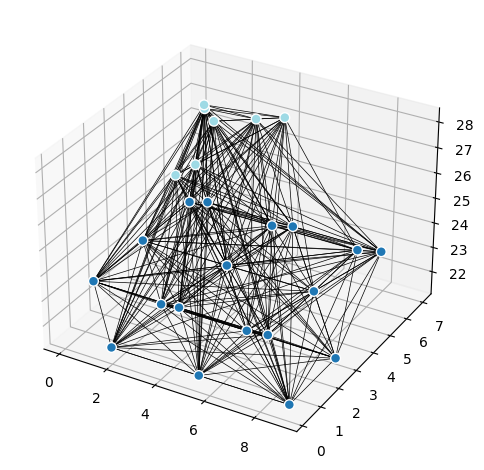

Graph with 25 nodes and 261 edges
{0: [0.0, 4.013790607452393, 22.82491683959961], 1: [3.596992254257202, 4.013790607452393, 22.82491683959961], 2: [7.193984508514404, 4.013790607452393, 22.82491683959961], 3: [0.0, 1.4703328609466553, 22.82491683959961], 4: [0.0, 6.557248115539551, 22.82491683959961], 5: [1.798496127128601, 0.19860410690307617, 21.55318832397461], 6: [1.798496127128601, 2.7420616149902344, 21.55318832397461], 7: [1.798496127128601, 5.285519123077393, 24.09664535522461], 8: [3.596992254257202, 1.4703328609466553, 22.82491683959961], 9: [3.596992254257202, 6.557248115539551, 22.82491683959961], 10: [5.395488262176514, 0.19860410690307617, 21.55318832397461], 11: [5.395488262176514, 2.7420616149902344, 21.55318832397461], 12: [5.395488262176514, 5.285519123077393, 24.09664535522461], 13: [7.193984508514404, 1.4703328609466553, 22.82491683959961], 14: [7.193984508514404, 6.557248115539551, 22.82491683959961], 15: [8.992480278015137, 0.19860410690307617, 21.55318832397461]

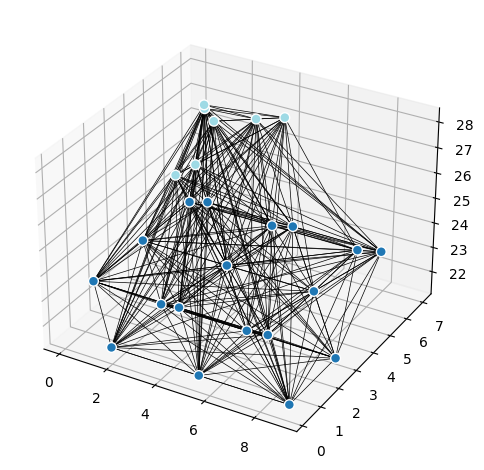

In [8]:
activations_dict = {}

trainer.model.module.embed_block.register_forward_hook(get_activation(f"{trainer.model.module.embed_block.__class__.__name__}", activations_dict))

for i, block in enumerate(trainer.model.module.interaction_blocks):
    block.register_forward_hook(get_activation(f"{block.__class__.__name__}_{i}", activations_dict))

with torch.no_grad():
    i = 20
    for i, x in enumerate(train_loader):
        if i == 20:
            break
    # plot graph 
    data_graph = oc20_to_graph(x[0], processed=False)
    plot_element_3d(data_graph)
    x_processed = process_datapoint(x[0], trainer)
    atomic_numbers = x[0].atomic_numbers
    data_graph = oc20_to_graph(x_processed)
    plot_element_3d(data_graph)
    base_output = trainer.model_forward(x)

/home/mila/a/ali.ramlaoui/.conda/envs/ocp/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Graph with 25 nodes and 261 edges
{0: [0.0, 4.013790607452393, 22.82491683959961], 1: [3.596992254257202, 4.013790607452393, 22.82491683959961], 2: [7.193984508514404, 4.013790607452393, 22.82491683959961], 3: [0.0, 1.4703328609466553, 22.82491683959961], 4: [0.0, 6.557248115539551, 22.82491683959961], 5: [1.798496127128601, 0.19860410690307617, 21.55318832397461], 6: [1.798496127128601, 2.7420616149902344, 21.55318832397461], 7: [1.798496127128601, 5.285519123077393, 24.09664535522461], 8: [3.596992254257202, 1.4703328609466553, 22.82491683959961], 9: [3.596992254257202, 6.557248115539551, 22.82491683959961], 10: [5.395488262176514, 0.19860410690307617, 21.55318832397461], 11: [5.395488262176514, 2.7420616149902344, 21.55318832397461], 12: [5.395488262176514, 5.285519123077393, 24.09664535522461], 13: [7.193984508514404, 1.4703328609466553, 22.82491683959961], 14: [7.193984508514404, 6.557248115539551, 22.82491683959961], 15: [8.992480278015137, 0.19860410690307617, 21.55318832397461]

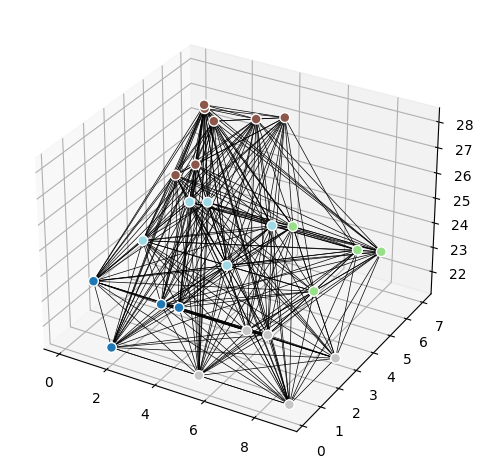

In [9]:
from sklearn.cluster import KMeans

n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
_ = kmeans.fit_transform(x_processed.pos.detach().cpu().numpy())

clusters = kmeans.labels_
centers = kmeans.cluster_centers_
distance_to_center = np.linalg.norm(x_processed.pos.detach().cpu().numpy() - centers[clusters], axis=1)

j = 0
nodes = np.arange(len(clusters))
orders = np.zeros_like(clusters)
for i in range(n_clusters):
    cluster_range = np.arange(j, j + (clusters == i).sum())
    orders[cluster_range] = nodes[clusters==i][np.argsort(distance_to_center[clusters == i])]
    j = j + (clusters == i).sum()

plot_element_3d(data_graph, order=orders, clusters=clusters)

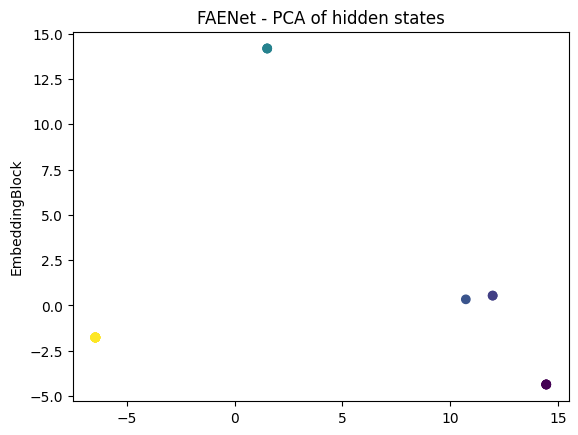

In [10]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib inline

plt.rc("animation", html="html5")

def plot_pca(model_name, base_activation, reorder=None):
    if reorder is None:
        reorder = np.arange(len(base_activation["InteractionBlock_0"]))
    key = "InteractionBlock_0"
    h = base_activation[key].cpu().numpy()[reorder]

    fig, ax = plt.subplots()

    pca = PCA(n_components=2)
    pca.fit(h)
    h_pca = pca.transform(h)
    # ax.scatter(h_pca[:, 0], h_pca[:, 1], c=np.arange(h_pca.shape[0]))
    ax.scatter(h_pca[:, 0], h_pca[:, 1], c=atomic_numbers)
    ax.set_title(f"{model_name} - PCA of hidden states")
    ax.set_ylabel(f"{key}")

    def update(key):
        if "EmbeddingBlock" in key: #only for faenet
            h = base_activation[key][0].cpu().numpy()[reorder]
        else:
            h = base_activation[key].cpu().numpy()[reorder]

        pca = PCA(n_components=2)
        pca.fit(h)
        h_pca = pca.transform(h)
        ax.clear()
        # ax.scatter(h_pca[:, 0], h_pca[:, 1], c=np.arange(h_pca.shape[0]))   
        ax.scatter(h_pca[:, 0], h_pca[:, 1], c=atomic_numbers)
        ax.set_title(f"{model_name} - PCA of hidden states")
        ax.set_ylabel(f"{key}")

        return ax
    
    ani = animation.FuncAnimation(fig, update, frames=list(base_activation.keys()), interval=1000)

    return ani

ani = plot_pca("FAENet", activations_dict)
ani

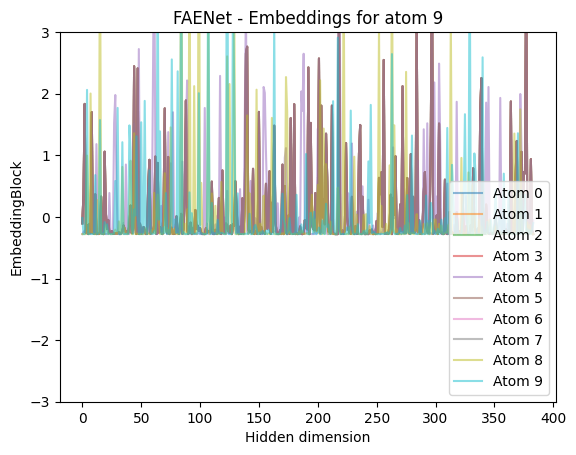

In [11]:
%matplotlib inline

plt.rc("animation", html="html5")

# compare the embeddings of the same atom in different blocks
def plot_embeddings(model_name, base_activation, reorder=None):
    if reorder is None:
        reorder = np.arange(len(base_activation["InteractionBlock_0"]))
    fig, ax = plt.subplots()

    for i in range(min(10, base_activation["InteractionBlock_0"].shape[0])):
        ax.plot(base_activation["InteractionBlock_0"][i, :].cpu().numpy()[reorder], label=f"Atom {i}", alpha=0.5)
    ax.set_xlabel("Hidden dimension")
    ax.set_ylabel("Activation")
    ax.set_title(f"{model_name} - Embeddings for atom {i}")
    ax.set(ylim=(-2, 2))
    ax.legend()

    def update(key):
        if key == "EmbeddingBlock":
            h = base_activation[key][0].cpu().numpy()[reorder]
        else:
            h = base_activation[key].cpu().numpy()[reorder]
        ax.clear()
        for i in range(min(10, h.shape[0])):
            ax.plot(h[i, :], label=f"Atom {i}", alpha=0.5)
        ax.set_xlabel("Hidden dimension")
        ax.set_ylabel(f"{key}")
        ax.set_title(f"{model_name} - Embeddings for atom {i}")
        ax.set(ylim=(-3, 3))
        ax.legend()
        return ax
    
    ani = animation.FuncAnimation(fig, update, frames=list(base_activation.keys()), interval=1000)
    return ani

ani = plot_embeddings("FAENet", activations_dict, reorder=orders)
ani

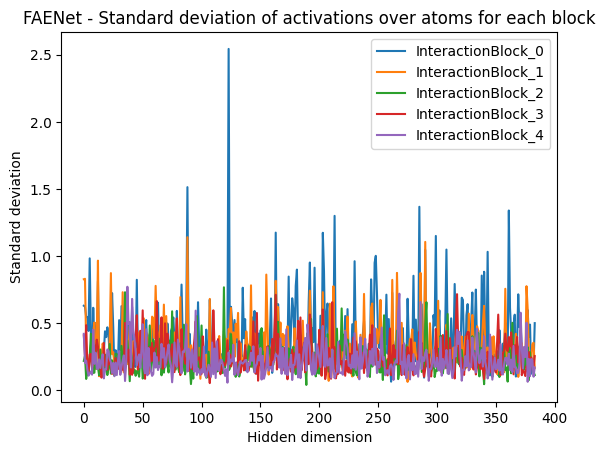

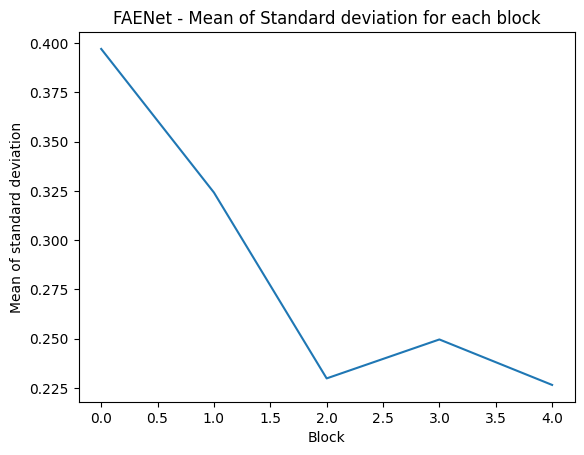

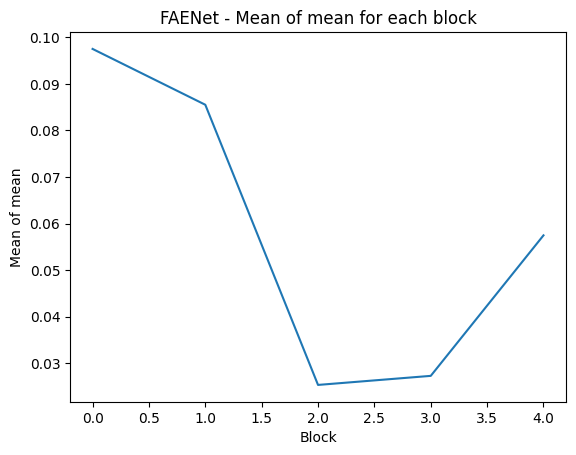

In [12]:
standard_deviations = []
means = []

for block, activations in activations_dict.items():
    if "Embedding" not in block:
        plt.plot(activations.std(0).cpu().numpy(), label=block)
        standard_deviations.append(activations.std(0).mean().cpu().numpy())
        means.append(activations.mean(0).mean().cpu().numpy())
plt.legend()
plt.title("FAENet - Standard deviation of activations over atoms for each block")
plt.xlabel("Hidden dimension")
plt.ylabel("Standard deviation")
plt.show()

plt.plot(standard_deviations)
plt.title("FAENet - Mean of Standard deviation for each block")
plt.xlabel("Block")
plt.ylabel("Mean of standard deviation")
plt.show()

plt.plot(means)
plt.title("FAENet - Mean of mean for each block")
plt.xlabel("Block")
plt.ylabel("Mean of mean")
plt.show()

[[ 0.9999997   0.9999997   0.9999997   0.9999997   0.22927307  0.9999997
   0.9999997   0.9999997  -0.02092212 -0.03698842 -0.0428375  -0.02092212
  -0.03698842 -0.03698842 -0.03698842  0.9999997   0.9999997   0.9999997
   0.9999997   0.9999997   0.9999997   0.22927307  0.9999997   0.22927307
   0.9999997 ]
 [ 0.9999997   0.9999997   0.9999997   0.9999997   0.22927307  0.9999997
   0.9999997   0.9999997  -0.02092212 -0.03698842 -0.0428375  -0.02092212
  -0.03698842 -0.03698842 -0.03698842  0.9999997   0.9999997   0.9999997
   0.9999997   0.9999997   0.9999997   0.22927307  0.9999997   0.22927307
   0.9999997 ]
 [ 0.9999997   0.9999997   0.9999997   0.9999997   0.22927307  0.9999997
   0.9999997   0.9999997  -0.02092212 -0.03698842 -0.0428375  -0.02092212
  -0.03698842 -0.03698842 -0.03698842  0.9999997   0.9999997   0.9999997
   0.9999997   0.9999997   0.9999997   0.22927307  0.9999997   0.22927307
   0.9999997 ]
 [ 0.9999997   0.9999997   0.9999997   0.9999997   0.22927307  0.9999997


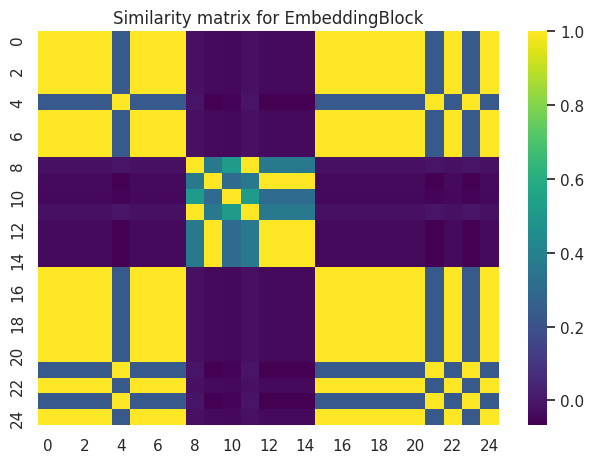

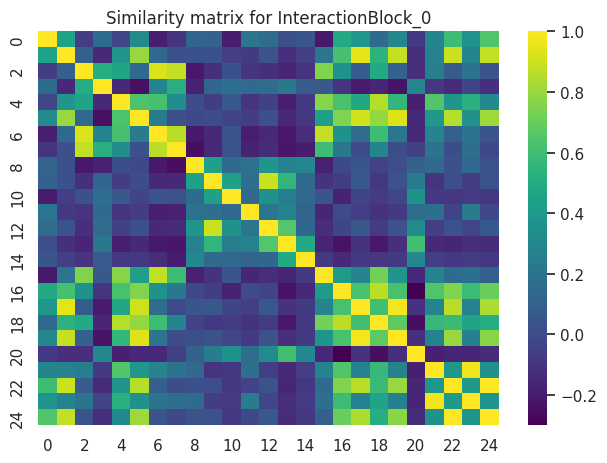

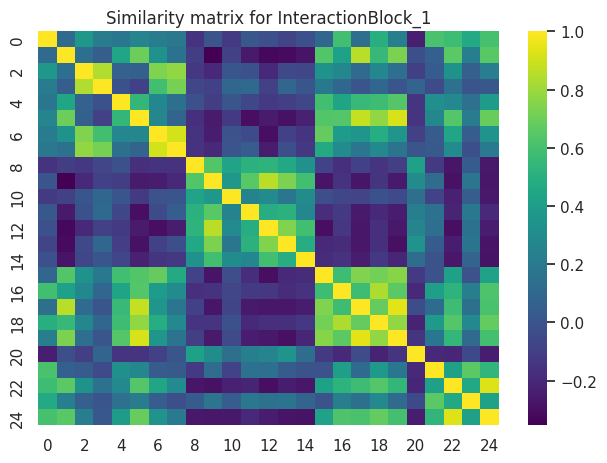

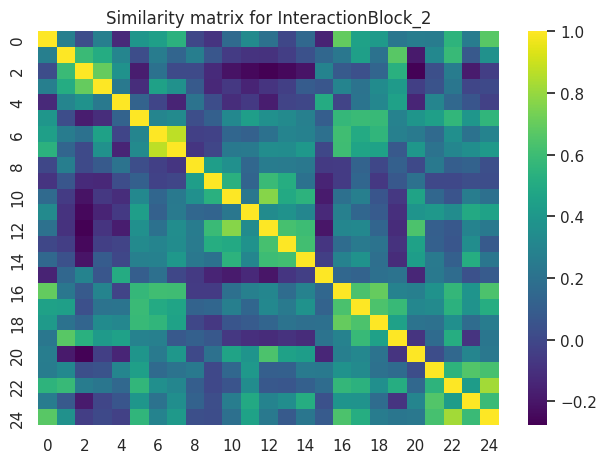

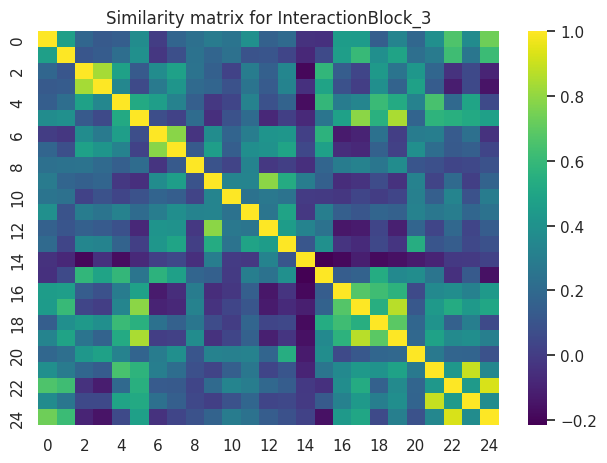

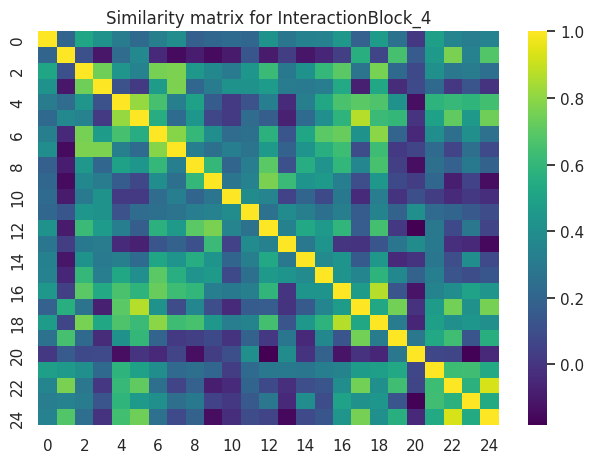

In [13]:
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

sns.set_theme()

for key, embedding_step in activations_dict.items():
    try:
        h = embedding_step.detach().cpu().numpy()[orders]
    except:
        h = embedding_step[0].detach().cpu().numpy()[orders]

    cosine_similarity_matrix = cosine_similarity(h, h)
    fig, ax = plt.subplots()
    ax.set_title(f"Similarity matrix for {key}")
    sns.heatmap(cosine_similarity_matrix, ax=ax, cmap="viridis")
    fig.tight_layout()
    fig.show()
    print(cosine_similarity_matrix)

    h_prev = h
    key_prev = key

    

In [14]:
h_prev = activations["EmbeddingBlock"][0].cpu().numpy()[orders]
key_prev = "EmbeddingBlock"
for key, embedding_step in activations_dict.items():
    if "EmbeddingBlock" in key:
        continue
    h = embedding_step.detach().cpu().numpy()[orders]

    cosine_similarity_matrix = cosine_similarity(h_prev, h)
    fig, ax = plt.subplots()
    ax.set_title(f"Similarity matrix for {key} and {key_prev}")
    sns.heatmap(cosine_similarity_matrix, ax=ax, cmap="viridis")
    fig.tight_layout()
    fig.show()
    print(cosine_similarity_matrix)

    h_prev = h
    key_prev = key

    

IndexError: too many indices for tensor of dimension 2